In [46]:
import numpy as np
import cv2 as cv
from itertools import permutations
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['image.cmap'] = 'gray'
%matplotlib inline

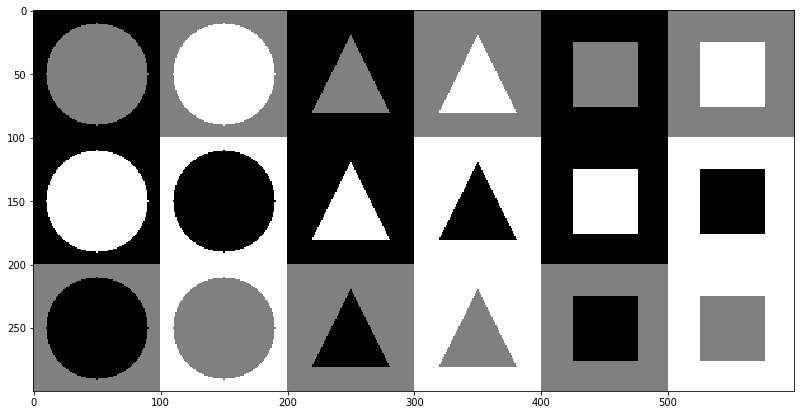

In [47]:
colors = [0, 1, 2]

image = np.zeros((300,600), dtype=np.int8)

ind = 0
for figure in ["circle", "triangle", "square"]:

    for pair in permutations(colors, 2):

        img = np.ones((100,100), dtype=np.int8)*pair[0]
        
        if figure == "circle":
            cv.circle(img, (50,50), 40, pair[1], -1)
        
        if figure == "triangle":
            pts = np.array([[50,20],[20,80],[80,80]], np.int32)
            pts = pts.reshape((-1,1,2))
            cv.fillPoly(img, [pts], pair[1])
        
        if figure == "square":
            pts = np.array([[25,25],[25,75],[75,75],[75,25]], np.int32)
            pts = pts.reshape((-1,1,2))
            cv.fillPoly(img, [pts], pair[1])
        
        np.copyto(image[(ind%3)*100 : (ind%3)*100+100,
                        (ind//3)*100 : (ind//3)*100+100], img)
        
        ind+=1

plt.figure(figsize=[21, 7])
plt.imshow(image)
plt.show()

In [48]:
#list(map(lambda x: x*180 if x*180 < 255 else 255, image))
img = np.zeros((300,600), dtype=np.float)

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if image[i, j] == 1:
            img[i, j] = 128
        elif image[i, j] == 2:
            img[i, j] = 255

        
       

In [49]:
# print(image)
# print(img)

In [50]:
kernel = np.array([[-1,0,1],[-3,0,3],[-1,0,1]])

In [51]:
gradient_1  = cv.filter2D(img, -1, kernel) #vert
gradient_2 = cv.filter2D(img, -1, (kernel * -1).T) #horiz

module =  (gradient_1**2 + gradient_2**2)**0.5

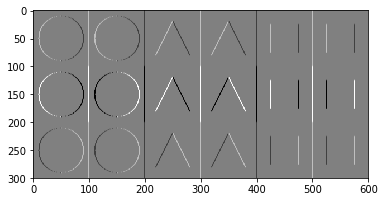

In [52]:
plt.imshow(gradient_1, cmap='gray')
plt.show()

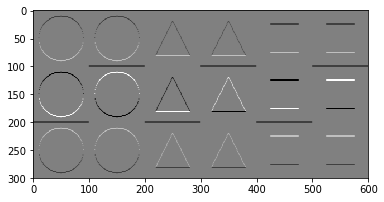

In [53]:
plt.imshow(gradient_2, cmap='gray')
plt.show()